In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

Dataset source: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [101]:
csv_file_path = '/content/drive/MyDrive/Datasets/SMSSpamCollection'
df = pd.read_csv(csv_file_path, sep='\t', header=None, names=['class', 'message'])
print(df.head())
print()

print(df.describe())
print()

num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')
print()

print(f'Column names: {df.columns}')
print()


  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

       class                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

Number of rows: 5572
Number of columns: 2

Column names: Index(['class', 'message'], dtype='object')



In [102]:
#4825 Ham
#747 Spam

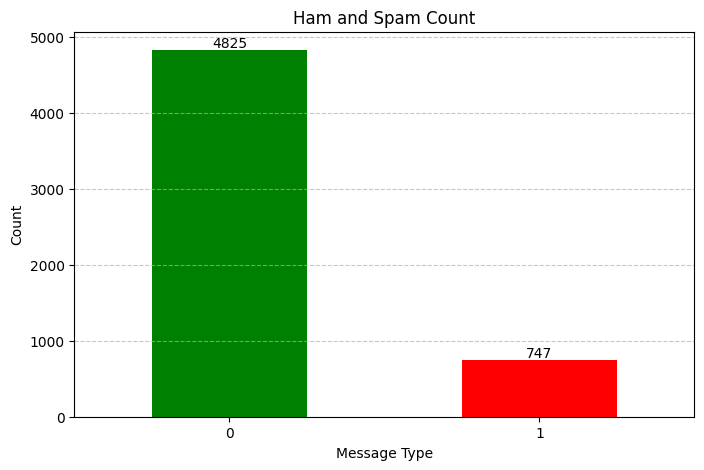

In [109]:
data = df['class'].value_counts()
plt.figure(figsize=(8, 5))
patches = data.plot(kind='bar', color=['green', 'red'])
plt.title('Ham and Spam Count')
plt.xlabel('Message Type')
plt.ylabel('Count')
#x label horizontal
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in patches.patches:
    plt.annotate(f'{bar.get_height()}',
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.show()

In [110]:
df['class'] = df['class'].replace({'ham': 0, 'spam': 1})

print(df.head())

   class                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Tutorial: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [123]:
X = df["message"]
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
vectorizer = TfidfVectorizer()

#transform text into numerical values
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [118]:
# shape of X and Y
X_train.shape, X_test.shape

((3733, 7082), (1839, 7082))

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56 Evaluating a random forst model

In [119]:
from sklearn.metrics import confusion_matrix
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9804241435562806

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1593
           1       1.00      0.85      0.92       246

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



In [120]:
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [  36,  210]])

In [121]:
#testing
import random

random_index = random.randint(0, X_test.shape[0] - 1)

random_message = df.iloc[y_test.index[random_index]]['message']
#retrieving the Actual Label
actual_label = y_test.iloc[random_index]

random_message_vectorized = vectorizer.transform([random_message])
predicted_label = rf_clf.predict(random_message_vectorized)

print("Random Message:", random_message)
print("Actual Label:", "Spam" if actual_label == 1 else "Ham")
print("Predicted Label:", "Spam" if predicted_label[0] == 1 else "Ham")


Random Message: Ay wana meet on sat?ü wkg on sat?
Actual Label: Ham
Predicted Label: Ham


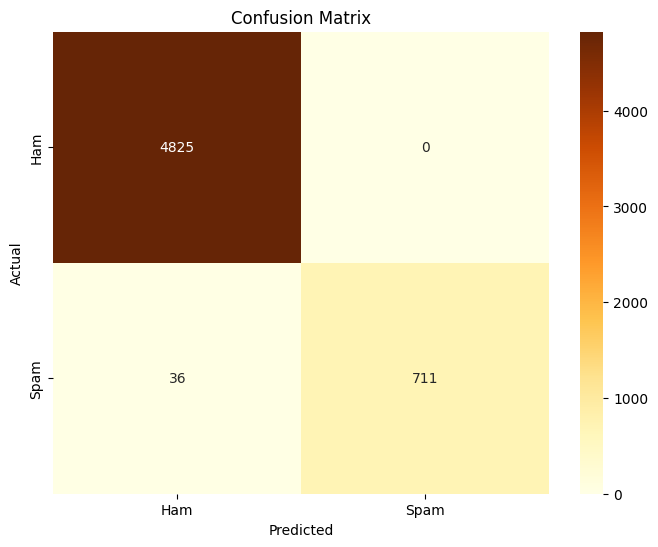

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00      4825
        Spam       1.00      0.95      0.98       747

    accuracy                           0.99      5572
   macro avg       1.00      0.98      0.99      5572
weighted avg       0.99      0.99      0.99      5572



In [122]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_test = df[['message']]
y_test = df['class']

y_pred = rf_clf.predict(vectorizer.transform(X_test['message']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))